In [366]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
os.chdir('/Users/yehhsuan-yu/Downloads')
np.random.seed(8)

df = pd.read_csv('traincom.csv').fillna(' ')
df.head(10)
df = df.loc[:,["comment_text","toxic"]]

df_toxic = df[df['toxic']==1]
df_nontoxic = df[df['toxic']==0]

In [368]:
from sklearn.utils import resample
n = 5000
df_nontoxic_resample=resample(df_nontoxic, n_samples=n, replace=False, random_state=0)
df_toxic_resample=resample(df_toxic, n_samples=n, replace=False, random_state=0)
df=df_nontoxic_resample.append(df_toxic_resample,ignore_index=True)

from sklearn.model_selection import train_test_split
train, test=train_test_split(df, test_size=0.2)

In [369]:
train.to_csv('train.csv')
test.to_csv('test.csv')

# CountVectorizer

In [354]:
import os
os.chdir('/Users/yehhsuan-yu/Downloads')
X_train = pd.read_csv('train.csv').fillna(' ').iloc[:,0:56]
X_test = pd.read_csv('test.csv').fillna(' ').iloc[:,0:56]
X_train_tfidf = pd.read_csv('train_tfidf.csv').fillna(' ').iloc[:,0:56]
X_test_tfidf = pd.read_csv('test_tfidf.csv').fillna(' ').iloc[:,0:56]
X_train.shape

(8000, 56)

In [370]:
from sklearn.feature_extraction.text import CountVectorizer
df=train.append(test,ignore_index=True)
text=df["comment_text"]

word_vectorizer=CountVectorizer(
    #sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=100)
# tokenize and build vocab
word_vectorizer.fit(text)


train_features = word_vectorizer.transform(train['comment_text'])
test_features=word_vectorizer.transform(test['comment_text'])
print(train_features.shape)
#print(word_vectorizer.get_feature_names())
print(test_features.shape)

(8000, 100)
(2000, 100)


In [28]:
# class count
import os
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project/feature')
train_features_df = pd.DataFrame(train_features.toarray())
toxic_df = pd.DataFrame(train['identity_hate'])
#train_features_toxic = train_features_df.append(toxic_df)
train_features_toxic = pd.concat([train_features_df, toxic_df.reset_index(drop=True)], ignore_index=True, axis=1)

#train_features_toxic
#train_features_toxic = train_features.append(toxic_df)
name = pd.DataFrame(word_vectorizer.get_feature_names())
name.to_csv('name1.csv')
train_features_toxic.to_csv('train_feaures_identity.csv')

In [337]:
# PCA
from sklearn import preprocessing
from scipy.sparse import coo_matrix, vstack
#train_features = pd.DataFrame(train_features.toarray())
#train_features_1 = (train_features-train_features.mean())/train_features.std(ddof=0)
#test_features = pd.DataFrame(test_features.toarray())
#test_features_1 = (test_features-test_features.mean())/test_features.std(ddof=0)
features = vstack([train_features,test_features])
features_scaled = preprocessing.scale(features.toarray(), )
PCA100_count = PCA(n_components=100).fit(features_scaled)
print(np.cumsum(PCA100_count.explained_variance_ratio_))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[0.04875175 0.08194877 0.10595649 0.12914994 0.15157189 0.17156522
 0.19154388 0.21141288 0.23126589 0.25103599 0.27061734 0.29004415
 0.3081852  0.32617288 0.34335583 0.35979468 0.37618057 0.39241785
 0.40682316 0.42105592 0.43475413 0.44833581 0.46179586 0.47401536
 0.48587491 0.49768049 0.50934265 0.5202876  0.53120135 0.54179987
 0.55222578 0.56234551 0.57240138 0.58240901 0.59241347 0.60241616
 0.61241788 0.62241938 0.63242065 0.64242174 0.65242275 0.66241536
 0.67238052 0.68228327 0.69215962 0.70185606 0.71141248 0.72088598
 0.73013552 0.7393387  0.74848858 0.75744487 0.76635435 0.77518276
 0.78393797 0.79242142 0.80082824 0.80911861 0.81717565 0.82522302
 0.83319791 0.84091001 0.84858972 0.85616332 0.86351931 0.87068348
 0.8777959  0.88484443 0.89167747 0.89844744 0.90513825 0.91173086
 0.91819179 0.92457938 0.93094335 0.93693828 0.94278976 0.94854736
 0.95420449 0.95966941 0.96442573 0.9688026  0.97304919 0.97697906
 0.98081347 0.98457645 0.98814129 0.99126465 0.99359979 0.9954

In [331]:
from sklearn.decomposition import PCA
PCA57_count = PCA(n_components=57).fit(features_scaled)
#print(np.cumsum(PCA57_count.explained_variance_ratio_)[0:57]) 
X = PCA57_count.transform(features_scaled)
X_train, X_test=train_test_split(X, test_size=0.2)


In [343]:
print(X_train.shape)

(8000, 58)


(8000, 100)


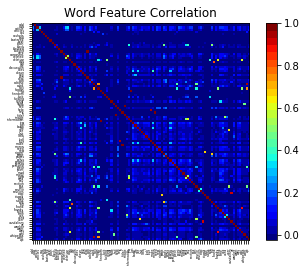

In [132]:
print(train_features.shape)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = plt.cm.get_cmap('jet',30)
cax = ax1.imshow(train_features.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(False)
plt.title('Word Feature Correlation')
labels=word_vectorizer.get_feature_names()
ax1.set_xticks(np.arange(0,100))
ax1.set_yticks(np.arange(0,100))
ax1.set_xticklabels(labels,fontsize=3, rotation=90)
ax1.set_yticklabels(labels,fontsize=3)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.show()
fig.savefig('corr.png', format='png', dpi=1000)

In [248]:
# KNN-PCA

from sklearn.neighbors import KNeighborsClassifier

myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in neighbors:
    knn_count = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
    scores = cross_val_score(knn_count, X_train, np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_count = [1 - x for x in cv_scores]
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of neighbors is %d" % optimal_k)
#MSE_count_df = pd.DataFrame(MSE_count)
#MSE_count_df.to_csv('/home/hsuanyu/MSE_count.csv')

The optimal number of neighbors is 3


In [ ]:
myList = list(range(1,30))
neighbors = filter(lambda x: x%2 != 0, myList)
l = [i for i in neighbors]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of neighbors is %d" % optimal_k)
MSE_count_df = pd.DataFrame(MSE_count)
MSE_count_df.to_csv('MSE_count.csv')

import matplotlib.pyplot as plt
plt.plot(l, MSE_count)
plt.show()

In [360]:
# KNN-PCA


from sklearn.neighbors import KNeighborsClassifier
#from sklearn.grid_search import GridSearchCV
knn_tfidf = KNeighborsClassifier(n_neighbors=3, n_jobs=4).fit(X_train, np.array(train['toxic']))
predict_tfidf = knn_tfidf.predict(X_test)
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.6435


In [242]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB().fit(train_features.toarray(), np.array(train['toxic']))
predict = NB.predict(test_features.toarray())
predict=np.array(predict)
train_y=np.array(train['toxic'])
print(len(test['toxic']))
print(sum(predict==test['toxic'])/2000.0)

2000
0.7475


In [358]:
# NB-PCA
from sklearn.naive_bayes import GaussianNB
NB_tfidf = GaussianNB().fit(X_train, train['toxic'])
predict_tfidf = NB_tfidf.predict(X_test)
predict_tfidf=np.array(predict_tfidf)
train_y=np.array(train['toxic'])
print(len(test['toxic']))
print(sum(predict_tfidf==test['toxic'])/2000.0)

2000
0.4985


In [154]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_tfidf = LinearDiscriminantAnalysis().fit(train_features.toarray(), np.array(train['toxic']))
predict_tfidf = LDA_tfidf.predict(test_features.toarray())
predict_tfidf = np.array(predict_tfidf)
train_y = np.array(train['toxic'])
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.6945


In [359]:
# LDA-PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_tfidf = LinearDiscriminantAnalysis().fit(X_train, np.array(train['toxic']))
predict_tfidf = LDA_tfidf.predict(X_test)
predict_tfidf = np.array(predict_tfidf)
train_y = np.array(train['toxic'])
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.656


In [254]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
cv_scores = []
for k in n_estim:
    rf_count = RandomForestClassifier(n_estimators=k, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1)
    scores = cross_val_score(rf_count, X_train, np.array(train['toxic']), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE_count = [1 - x for x in cv_scores]

In [255]:
myList = list(range(1,30))
n_estim = filter(lambda x: x%2 != 0, myList)
l = [i for i in n_estim]
optimal_k = l[MSE_count.index(min(MSE_count))]
print ("The optimal number of estimators is %d" % optimal_k)

The optimal number of estimators is 15


In [361]:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=15, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1).fit(X_train, np.array(train['toxic']))
predict_tfidf = rf_tfidf.predict(X_test)
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.701


In [46]:
# K-means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1,1000,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(train_features.toarray())
    kmeanModel.fit(train_features.toarray())
    distortions.append(sum(np.min(cdist(train_features.toarray(), kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / train_features.toarray().shape[0])

In [41]:
K = range(1,100,5)
len(K)

15

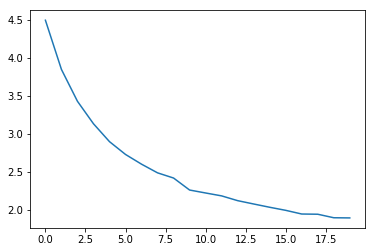

In [45]:
import matplotlib.pyplot as plt
plt.plot(distortions)
plt.show()

# TfidfVectorizer

In [319]:
from sklearn.feature_extraction.text import TfidfVectorizer
text=df["comment_text"]

word_vectorizer_tfidf=TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    #token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=100)
word_vectorizer_tfidf.fit(text)

train_features_tfidf = word_vectorizer_tfidf.transform(train['comment_text'])
test_features_tfidf = word_vectorizer_tfidf.transform(test['comment_text'])
#print(train_features_tfidf.shape)
#word_vectorizer_tfidf.get_feature_names()

In [148]:
import os
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project/feature')
train_features_df = pd.DataFrame(train_features.toarray())
toxic_df = pd.DataFrame(train['toxic'])
#train_features_toxic = train_features_df.append(toxic_df)
train_features_toxic = pd.concat([train_features_df, toxic_df.reset_index(drop=True)], ignore_index=True, axis=1)

#train_features_toxic
#train_features_toxic = train_features.append(toxic_df)
name = pd.DataFrame(word_vectorizer_tfidf.get_feature_names())
name.to_csv('tfidf_name3.csv')
train_features_toxic.to_csv('train_feaures_tfidf_toxic3.csv')

In [320]:
# PCA
from sklearn import preprocessing
from scipy.sparse import coo_matrix, vstack
#train_features = pd.DataFrame(train_features.toarray())
#train_features_1 = (train_features-train_features.mean())/train_features.std(ddof=0)
#test_features = pd.DataFrame(test_features.toarray())
#test_features_1 = (test_features-test_features.mean())/test_features.std(ddof=0)
features = vstack([train_features_tfidf,test_features_tfidf])

features_scaled = preprocessing.scale(features.toarray())
dat_t = np.transpose(min_max_scaler)
print(np.cov(dat_t))

[[ 1.00010001e+00 -1.78396082e-03  2.32866272e-01 ...  3.20268693e-02
   1.04907737e-02  3.89668945e-02]
 [-1.78396082e-03  1.00010001e+00 -3.11929287e-03 ... -9.13008599e-04
  -5.23760812e-04 -1.46594217e-03]
 [ 2.32866272e-01 -3.11929287e-03  1.00010001e+00 ...  6.29226835e-02
   3.04925379e-02  1.18357233e-01]
 ...
 [ 3.20268693e-02 -9.13008599e-04  6.29226835e-02 ...  1.00010001e+00
   2.79611319e-03  1.69671514e-02]
 [ 1.04907737e-02 -5.23760812e-04  3.04925379e-02 ...  2.79611319e-03
   1.00010001e+00  9.85291831e-03]
 [ 3.89668945e-02 -1.46594217e-03  1.18357233e-01 ...  1.69671514e-02
   9.85291831e-03  1.00010001e+00]]


In [321]:
from sklearn.decomposition import PCA
PCA57_count = PCA(n_components=100).fit(features_scaled)
print(np.cumsum(PCA57_count.explained_variance_ratio_)[0:62]) 

[0.04011071 0.08019731 0.11020254 0.13147669 0.1522747  0.17259071
 0.19264818 0.21247744 0.2308648  0.24780439 0.26464218 0.2812606
 0.29635873 0.31044833 0.32416591 0.33647337 0.34844344 0.36024141
 0.37164051 0.3829567  0.39419036 0.40536551 0.41637502 0.4272804
 0.43809739 0.44884241 0.45955818 0.47021995 0.48076842 0.49129129
 0.5017497  0.5121031  0.52242271 0.53266675 0.54282777 0.55296508
 0.56307786 0.57312911 0.58316964 0.59317151 0.60314898 0.61310284
 0.62302525 0.63290425 0.64272185 0.65251094 0.6622717  0.67196836
 0.68164109 0.69126216 0.7008195  0.71037093 0.71985059 0.72929183
 0.73872573 0.74812233 0.75745177 0.76672827 0.77599451 0.78522146
 0.79443167 0.80360042]


In [84]:
# PCA
train_features_tfidf = pd.DataFrame(train_features_tfidf.toarray())
train_features_2 = (train_features_tfidf-train_features_tfidf.mean())/train_features_tfidf.std(ddof=0)

from sklearn.decomposition import PCA
PCA100 = PCA(n_components=100).fit(train_features_2)
os.chdir('/Users/yehhsuan-yu/Umich/Stats503/project')
#pickle.dump(PCA30_tfidf, open('PCA30_tfidf.p','wb'))
print(type(PCA100))
print(PCA100.get_covariance())
#print(np.cumsum(PCA100.explained_variance_ratio_)) 
PCAcumsum_df = pd.DataFrame(np.cumsum(PCA100.explained_variance_ratio_))
PCAcumsum_df.to_csv('PCAcumsum_tfidf.csv')

<class 'sklearn.decomposition.pca.PCA'>
[[ 1.00012502  0.14859486  0.14859486 ... -0.00796792 -0.009537
  -0.00773212]
 [ 0.14859486  1.00012502  1.00012502 ... -0.00197498 -0.00409311
  -0.00191653]
 [ 0.14859486  1.00012502  1.00012502 ... -0.00197498 -0.00409311
  -0.00191653]
 ...
 [-0.00796792 -0.00197498 -0.00197498 ...  1.00012502  0.07556683
   0.00867277]
 [-0.009537   -0.00409311 -0.00409311 ...  0.07556683  1.00012502
   0.00111841]
 [-0.00773212 -0.00191653 -0.00191653 ...  0.00867277  0.00111841
   1.00012502]]


(8000, 100)


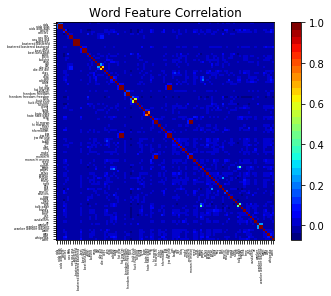

In [136]:
print(train_features.shape)
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = plt.cm.get_cmap('jet',30)
cax = ax1.imshow(train_features_tfidf.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(False)
plt.title('Word Feature Correlation')
labels=word_vectorizer_tfidf.get_feature_names()
ax1.set_xticks(np.arange(0,100))
ax1.set_yticks(np.arange(0,100))
ax1.set_xticklabels(labels,fontsize=3, rotation=90)
ax1.set_yticklabels(labels,fontsize=3)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.show()
fig.savefig('corr_tfidf.png', format='png', dpi=1000)

In [155]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
NB_tfidf = MultinomialNB().fit(train_features_tfidf, train['toxic'])
predict_tfidf = NB_tfidf.predict(test_features_tfidf)
predict_tfidf=np.array(predict_tfidf)
train_y=np.array(train['toxic'])
#print(len(test['toxic']))
print(sum(predict_tfidf==test['toxic'])/2000.0)

0.7435


In [362]:
# NB-PCA
from sklearn.naive_bayes import GaussianNB
NB_tfidf = GaussianNB().fit(X_train_tfidf, train['toxic'])
predict_tfidf = NB_tfidf.predict(X_test_tfidf)
predict_tfidf=np.array(predict_tfidf)
train_y=np.array(train['toxic'])
print(len(test['toxic']))
print(sum(predict_tfidf==test['toxic'])/2000.0)

2000
0.6645


In [159]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_tfidf = LinearDiscriminantAnalysis().fit(train_features_tfidf.toarray(), np.array(train['toxic']))
predict_tfidf = LDA_tfidf.predict(test_features_tfidf.toarray())
predict_tfidf = np.array(predict_tfidf)
train_y = np.array(train['toxic'])
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.749


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [363]:
# LDA-PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_tfidf = LinearDiscriminantAnalysis().fit(X_train_tfidf, np.array(train['toxic']))
predict_tfidf = LDA_tfidf.predict(X_test_tfidf)
predict_tfidf = np.array(predict_tfidf)
train_y = np.array(train['toxic'])
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.7485


In [364]:
# KNN-PCA
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.grid_search import GridSearchCV
knn_tfidf = KNeighborsClassifier(n_neighbors=3, n_jobs=4).fit(X_train_tfidf, np.array(train['toxic']))
predict_tfidf = knn_tfidf.predict(X_test_tfidf)
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.7225


In [365]:
# RF-PCA
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=15, n_jobs=4, max_depth=10, max_features='sqrt', min_samples_leaf = 1).fit(X_train_tfidf, np.array(train['toxic']))
predict_tfidf = rf_tfidf.predict(X_test_tfidf)
predict_tfidf = np.array(predict_tfidf)
print(sum(predict_tfidf == test['toxic'])/2000.0)

0.7545
